# Python Data Viz Libraries Cheat Sheet: 8 Popular Graphs Made with pandas, matplotlib, seaborn, and plotly.express

#### Author: [Dylan Castillo](https://twitter.com/_dylancastillo)

I'm teaching a course about the essential tools of Data Science. Among those, I'm going to cover how to use some of the most popular data visualization libraries in Python: `pandas` (yes, that's not a typo!), `matplotlib`, `seaborn`, and `plotly.express`.

I thought it'd be helpful for my students to have a cheat sheet showing frequently-used graphs made with these tools. So I wrote this cheat sheet.

In the next sections, you'll learn how to set up your local environment, read the data, and get the code to make the following types of graphs:

- Line plot
- Grouped bars plot
- Stacked bars plot
- Area chart
- Pie/Donut chart
- Histogram
- Scatter plot
- Boxplot

Let me know what you think!

## Set Up a Virtual Environment

Working with virtual environments will save you lots of headhaches when working in Python project. So, you'll start by creating one, and installing the required libraries.

If you're using `venv`, then here's how you set up your local enviroment:

```
$ python3 -m venv .dataviz
$ source .dataviz/bin/activate
(.dataviz) $ python3 -m pip install pandas==1.2.4 numpy==1.2.0 matplotlib==3.4.2 plotly==4.14.3 seaborn==0.11.1 notebook==6.4.0
(.dataviz) $ jupyter notebook 
```

If you're using `conda`, then you need to run these commands:

```
$ conda create --name .dataviz
$ conda activate .dataviz
(.dataviz) $ conda install pandas==1.2.4 numpy==1.19.2 matplotlib==3.4.2 plotly==4.14.3 seaborn==0.11.1 notebook==6.4.0 -y
$ jupyter notebook
```

That's it! These commands will:

1. Create a virtual environment called `.dataviz`
2. Active the virtual environment
3. Install the required packages (`pandas`, `numpy`, `matplotlib`, `plotly`, `seaborn`, and `notebook`)
4. Start a Jupyter Notebook

Note that if you're only planning on using just one of the data visualization libraries, then feel free not to install all of them. For example, if you want to use `plotly.express`, you don't need to install `matplotlib` and `seaborn`.

## Start Jupyter Notebook and Import Libraries

Open *Jupyter Notebook*. Then, create a new notebook by clicking on *New > Python3 notebook* in the menu. By now, you should have an empty Jupyter notebook in front of you. Now, let's get to the fun part!

First, you'll need to import the required libraries. Create a new cell in your notebook and paste the following code to import the required libraries:

In [4]:
# All
import pandas as pd
import numpy as np

# matplotlib
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

# plotly
import plotly.io as pio
import plotly.express as px

# seaborn
import seaborn as sns

# Set templates
pio.templates.default = "seaborn"
plt.style.use("seaborn")

This code will import the required libraries and set up the themes for `matplotlib` and `plotly`. Each library provides you with a specific set of functionalities:
    
- `pandas` helps you read the data
- `matplotlib.pyplot`, `plotly.express` and `seaborn` will help you make the graphs
- `matplotlib.ticker` provides with a way to set specific settings of the tickers on your axes in your `matplotlib` graphs
- `plotly.io` makes it easy to define a specific theme for your plotly graphs

In **lines 17 and 18**, you define the themes for `plotly` and `matplotlib`. In this case, you set them to use the `seaborn` theme. This will make the graphs from all the libraries look similar.

## Understand the Data

Throughout this tutorial you'll use a [dataset](https://github.com/szrlee/Stock-Time-Series-Analysis) with stock market data for 29 companies compiled by [ichardddddd](https://github.com/szrlee). It has the following columns:

- **Date**: Date corresponding to observed value
- **Open**: Price (in USD) at market open at the specified date
- **High**: Highest price (in USD) reached during the corresponding date
- **Low**: Lowest price (in USD) reached during the corresponding date 
- **Close**: Price (in USD) at market close at the specified date
- **Volume**: Number of shares traded
- **Name**: Stock symbol of the company

You can take a look ad the data by taking a sample of a few rows:

In [5]:
url = "https://raw.githubusercontent.com/szrlee/Stock-Time-Series-Analysis/master/data/all_stocks_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(url)
df.sample(5)

Date    Open    High     Low   Close     Volume  Name
74689  2014-10-20  101.42  101.77  100.96  101.48    6399355   UTX
46295  2009-12-18   64.75   64.75   63.91   64.37   22177755   JNJ
53302  2013-10-23   95.08   95.20   93.93   94.21    4588807   MCD
50538  2014-10-29   59.62   59.78   58.76   59.29   16715852   JPM
58070  2008-10-06   25.63   25.99   24.14   24.91  146408927  MSFT

This is a **long** dataset (in regards to the stock names). In the next sections, you'll notice that some libraries make it easy to work with data in this form, and others will require you to transform it into a wide dataset.

That's it! Now you can find whatever graph you'd like to make and copy-paste its code.

## Line Plot

Read the data as follows:

In [6]:
url = "https://raw.githubusercontent.com/szrlee/Stock-Time-Series-Analysis/master/data/all_stocks_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(url)

df = df.loc[df.Name.isin(["AAPL", "JPM", "GOOGL", "AMZN"]), ["Date", "Name", "Close"]]
df["Date"] = pd.to_datetime(df.Date)
df.rename(columns={"Close": "Closing Price"}, inplace=True)

### Line Plot Using `pandas`

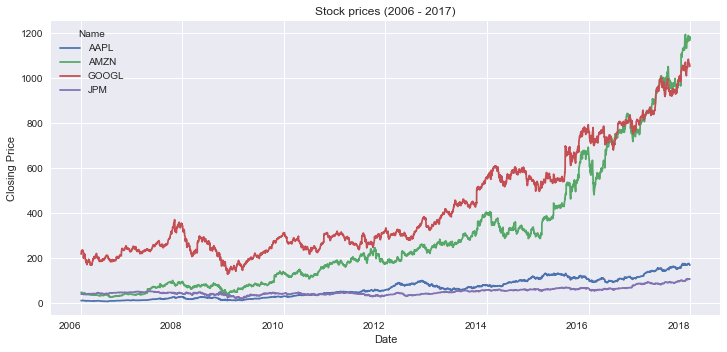

In [7]:
df_wide = df.pivot(index="Date", columns="Name", values="Closing Price")
df_wide.plot(
    title="Stock prices (2006 - 2017)", ylabel="Closing Price", figsize=(12, 6), rot=0
)

###  Line Plot Using `matplotlib`

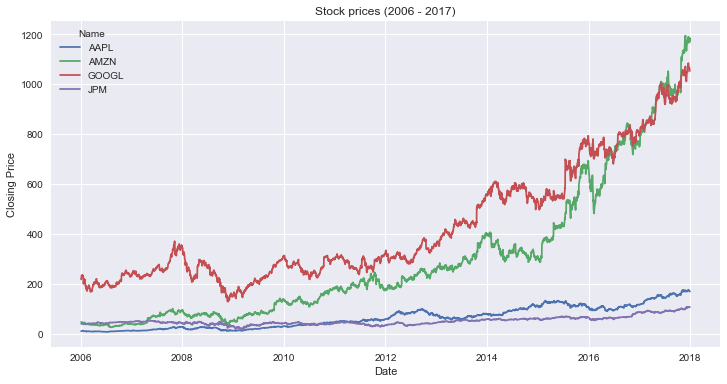

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))

for i, g in df.groupby("Name"):
    ax.plot(g["Date"], g["Closing Price"], label=i)

ax.set_title("Stock prices (2006 - 2017)")
ax.set_ylabel("Closing Price")
ax.set_xlabel("Date")
ax.legend(title="Name")

### Line Plot Using `seaborn`

Text(0.5, 1.0, 'Stock Prices (2006 - 2017)')

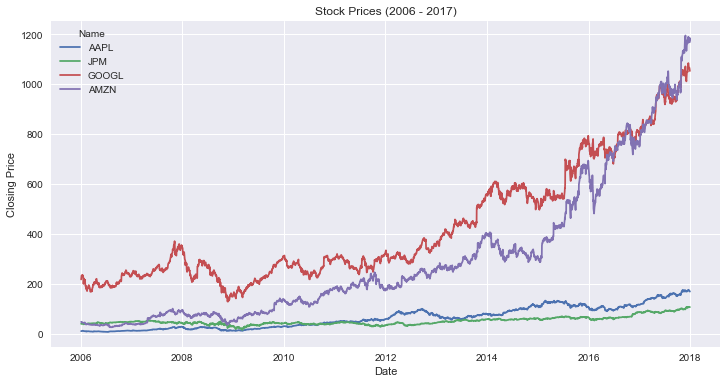

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Closing Price", hue="Name", ax=ax)
ax.set_title("Stock Prices (2006 - 2017)")

### Line Plot Using `plotly.express`

In [10]:
fig = px.line(
    df, x="Date", y="Closing Price", color="Name", title="Stock Prices (2006 - 2017)"
)
fig.show()

## Grouped Bars Plot

Read the data as follows:

In [11]:
url = "https://raw.githubusercontent.com/szrlee/Stock-Time-Series-Analysis/master/data/all_stocks_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(url)

df = df[df.Name == "AAPL"]
df["Year"] = pd.to_datetime(df.Date).dt.year
df = df.query("Year >= 2014").groupby("Year").max().reset_index(drop=False)

### Grouped Bars Using  `pandas`

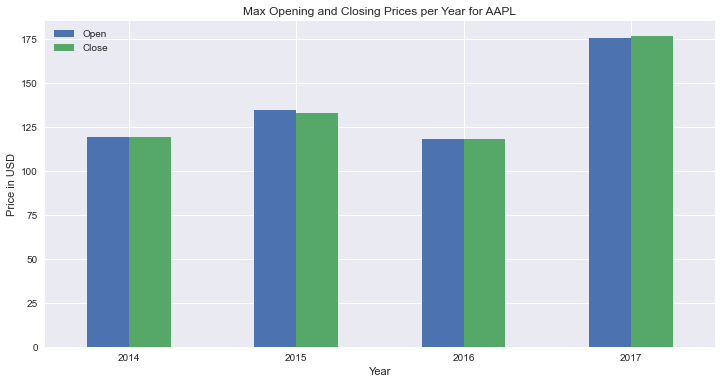

In [12]:
df.plot.bar(
    x="Year",
    y=["Open", "Close"],
    rot=0,
    figsize=(12, 6),
    ylabel="Price in USD",
    title="Max Opening and Closing Prices per Year for AAPL",
)

### Grouped Bars Using `matplotlib` 

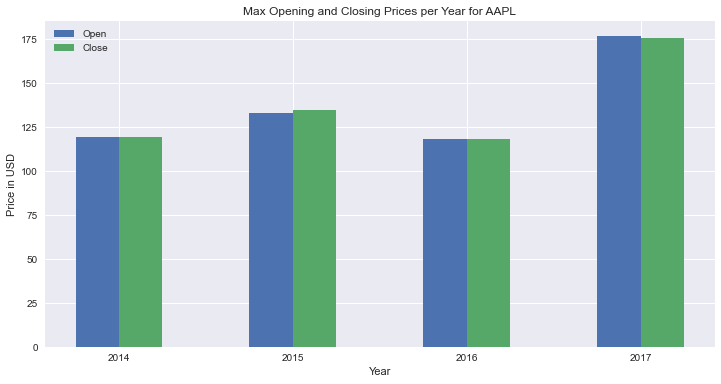

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(df.Year))
width = 0.25

ax.bar(x - width / 2, df.Close, width, label="Open")
ax.bar(x + width / 2, df.Open, width, label="Close")

ax.set_xlabel("Year")
ax.set_ylabel("Price in USD")
ax.set_title("Max Opening and Closing Prices per Year for AAPL")

ax.set_xticks(x)
ax.set_xticklabels(df.Year)

ax.legend()

### Grouped Bars Using `seaborn`

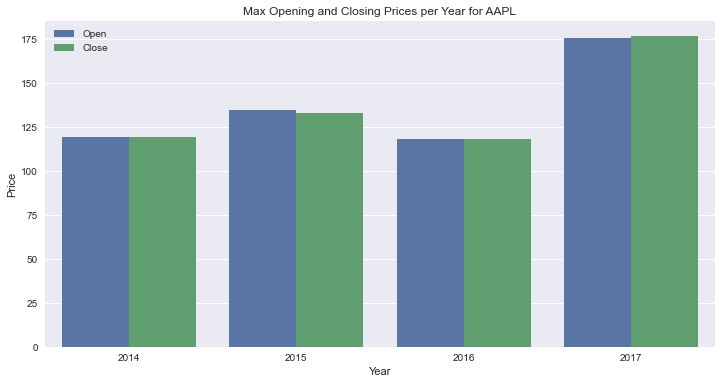

In [14]:
df_long = df.melt(
    id_vars="Year",
    value_vars=["Open", "Close"],
    var_name="Category",
    value_name="Price",
)

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=df_long, x="Year", y="Price", hue="Category", ax=ax)

ax.set_title("Max Opening and Closing Prices per Year for AAPL")
ax.legend(title=None)

### Grouped Bars Using `plotly.express`

In [15]:
fig = px.bar(
    df,
    x="Year",
    y=["Open", "Close"],
    title="Max Opening and Closing Prices per Year for AAPL",
    barmode="group",
    labels={"value": "Price in USD"},
)
fig.show()

## Stacked Bars Plot

Read the data as follows:

In [16]:
url = "https://raw.githubusercontent.com/szrlee/Stock-Time-Series-Analysis/master/data/all_stocks_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(url)

stocks_filter = ["AAPL", "JPM", "GOOGL", "AMZN", "IBM"]
df = df[df.Name.isin(stocks_filter)]
df["Date"] = pd.to_datetime(df.Date)
df["Year"] = pd.to_datetime(df.Date).dt.year
df["Volume"] = df["Volume"] / 1e9

df = (
    df[["Year", "Volume", "Name"]]
    .query("Year >= 2012")
    .groupby(["Year", "Name"])
    .sum()
    .reset_index(drop=False)
)

### Stacked Bars Using `pandas` 

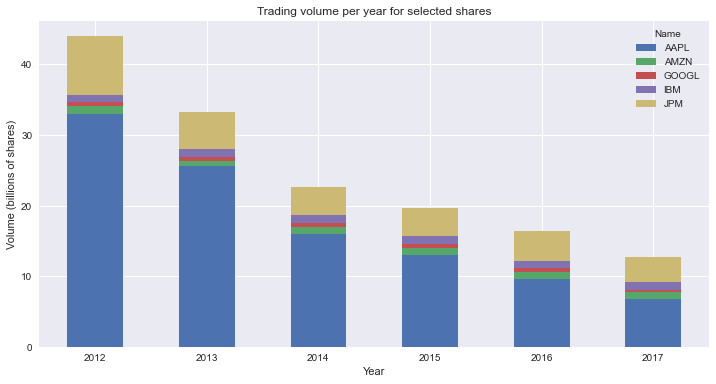

In [17]:
df_wide = df.pivot(index="Year", columns="Name", values="Volume")
df_wide.plot.bar(
    rot=0,
    figsize=(12, 6),
    ylabel="Volume (billions of shares)",
    title="Trading volume per year for selected shares",
    stacked=True,
)

### Stacked Bars Using `matplotlib`

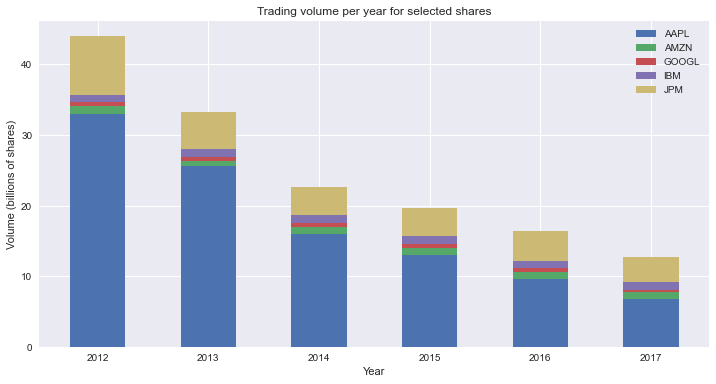

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

bottom = np.zeros(df.Year.nunique())
for i, g in df.groupby("Name"):
    ax.bar(g["Year"], g["Volume"], bottom=bottom, label=i, width=0.5)
    bottom += g["Volume"].values

ax.set_title("Trading volume per year for selected shares")
ax.set_ylabel("Volume (billions of shares)")
ax.set_xlabel("Year")

ax.legend()

### Stacked Bars Using `seaborn`

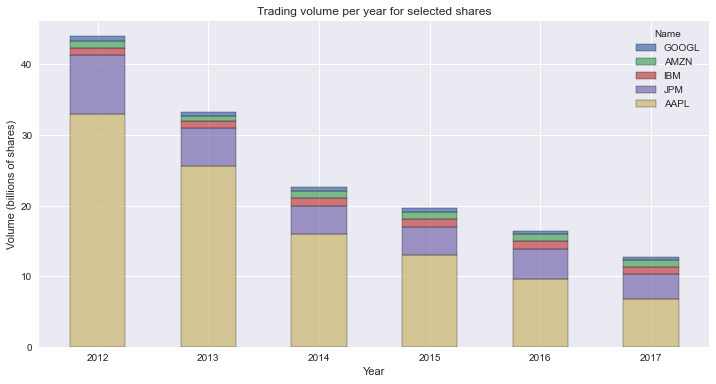

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.histplot(
    x=df.Year,
    hue=df.Name,
    weights=df.Volume,
    multiple="stack",
    shrink=0.5,
    discrete=True,
    hue_order=df.groupby("Name").Volume.sum().sort_values().index,
)

ax.set_title("Trading volume per year for selected shares")
ax.set_ylabel("Volume (billions of shares)")

legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))

### Stacked Bars Using `plotly.express`

In [20]:
fig = px.bar(
    df,
    x="Year",
    y="Volume",
    color="Name",
    title="Trading volume per year for selected shares",
    barmode="stack",
    labels={"Volume": "Volume (billions of shares)"},
)
fig.show()

## Area Chart

Read the data as follows:

In [21]:
url = "https://raw.githubusercontent.com/szrlee/Stock-Time-Series-Analysis/master/data/all_stocks_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(url)

stocks = ["AAPL", "AMZN", "GOOGL", "IBM", "JPM"]
df = df.loc[df.Name.isin(stocks), ["Date", "Name", "Volume"]]
df["Date"] = pd.to_datetime(df.Date)
df = df[df.Date.dt.year >= 2017]
df["Volume Perc"] = df["Volume"] / df.groupby("Date")["Volume"].transform("sum")

### Area Chart Using `pandas`

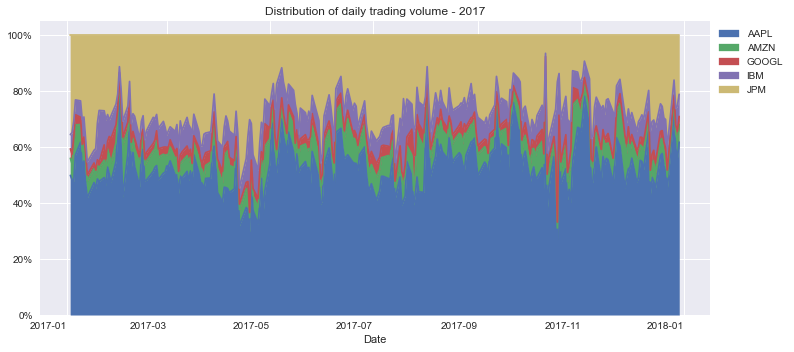

In [22]:
df_wide = df.pivot(index="Date", columns="Name", values="Volume Perc")

ax = df_wide.plot.area(
    rot=0,
    figsize=(12, 6),
    title="Distribution of daily trading volume - 2017",
    stacked=True,
)
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

### Area Chart Using `matplotlib`

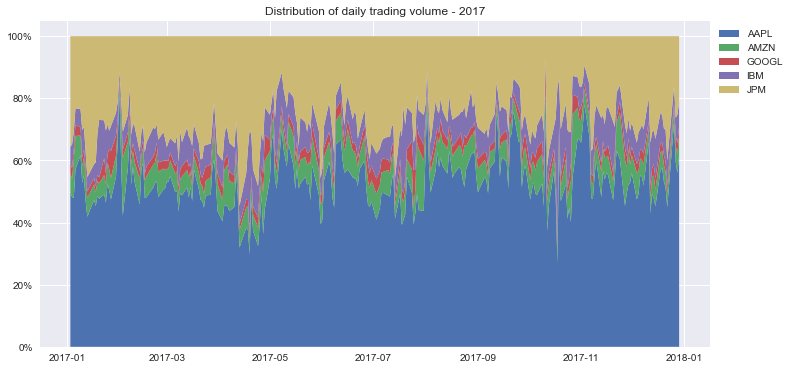

In [23]:
df_wide = df.pivot(index="Date", columns="Name", values="Volume Perc")

fig, ax = plt.subplots(figsize=(12, 6))

ax.stackplot(df_wide.index, [df_wide[col].values for col in stocks], labels=stocks)
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")

ax.set_title("Distribution of daily trading volume - 2017")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

### Area Chart Using `plotly.express`

In [24]:
fig = px.area(
    df,
    x="Date",
    y="Volume Perc",
    color="Name",
    title="Distribution of daily trading volume - 2017",
)
fig.update_layout(yaxis_tickformat="%")
fig.show()

## Pie or Donut Chart

Read the data as follows:

In [25]:
url = "https://raw.githubusercontent.com/szrlee/Stock-Time-Series-Analysis/master/data/all_stocks_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(url)

stocks_filter = ["AAPL", "JPM", "GOOGL", "AMZN", "IBM"]
df = df.loc[df.Name.isin(stocks_filter), ["Name", "Volume"]]
df = df.groupby("Name").sum().reset_index()

### Pie/Donut Chart Using `pandas`

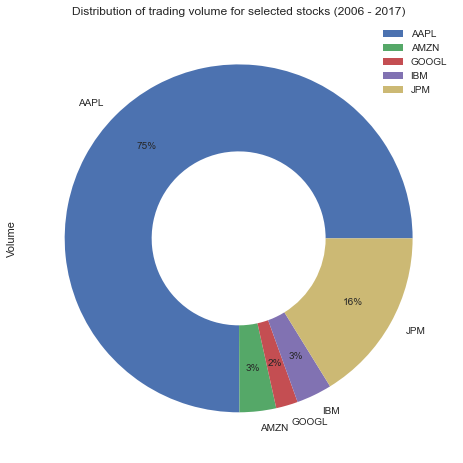

In [26]:
df.set_index("Name").plot.pie(
    y="Volume",
    wedgeprops=dict(width=0.5),
    figsize=(8, 8),
    autopct="%1.0f%%",
    pctdistance=0.75,
    title="Distribution of trading volume for selected stocks (2006 - 2017)",
)

### Pie/Donut Chart Using `matplotlib`

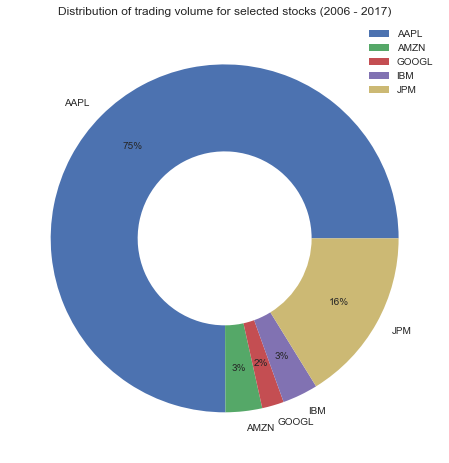

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(
    df.Volume,
    labels=df.Name,
    autopct="%1.0f%%",
    wedgeprops=dict(width=0.5),
    pctdistance=0.75,
)
ax.set_title("Distribution of trading volume for selected stocks (2006 - 2017)")
ax.legend()

### Pie/Donut Chart Using `plotly.express`

In [28]:
fig = px.pie(
    data_frame=df,
    values="Volume",
    names="Name",
    hole=0.5,
    color="Name",
    title="Distribution of trading volume for selected stocks (2006 - 2017)",
)
fig.show()

## Histogram

Read the data as follows:

In [29]:
url = "https://raw.githubusercontent.com/szrlee/Stock-Time-Series-Analysis/master/data/all_stocks_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(url)

stocks_filter = ["GOOGL", "AMZN"]
df = df.loc[df.Name.isin(stocks_filter), ["Name", "Close"]]

### Histogram Using `pandas`

Text(0.5, 0, 'Closing Price')

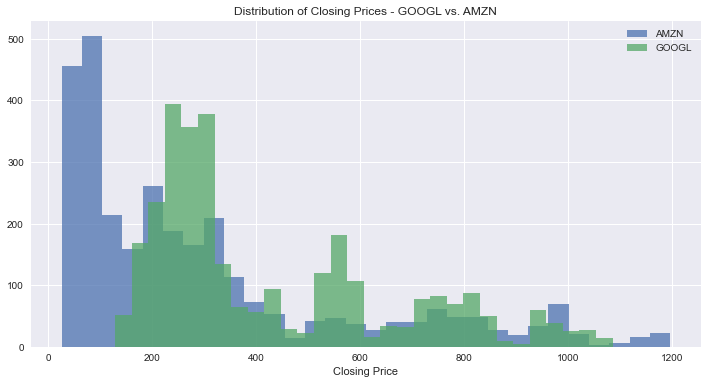

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))

for i, g in df.groupby("Name"):
    g.hist(ax=ax, alpha=0.75, label=i, bins=30)

ax.legend()
ax.set_title("Distribution of Closing Prices - GOOGL vs. AMZN")
ax.set_xlabel("Closing Price")

### Histogram Using `matplotlib`

Text(0.5, 0, 'Closing Price')

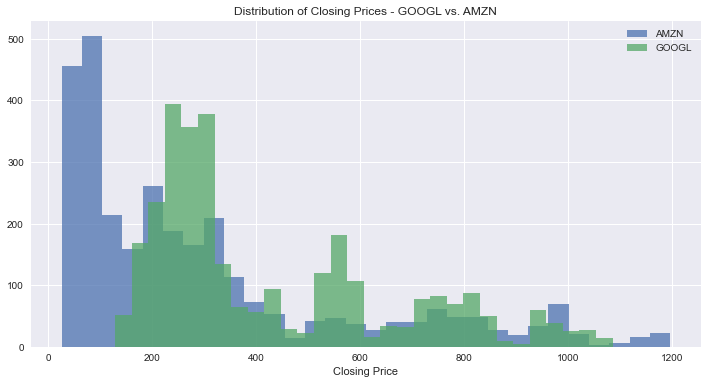

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))

for i, g in df.groupby("Name"):
    ax.hist(x=g.Close, alpha=0.75, label=i, bins=30)

ax.legend()
ax.set_title("Distribution of Closing Prices - GOOGL vs. AMZN")
ax.set_xlabel("Closing Price")

### Histogram Using `seaborn`

Text(0.5, 0, 'Closing Price')

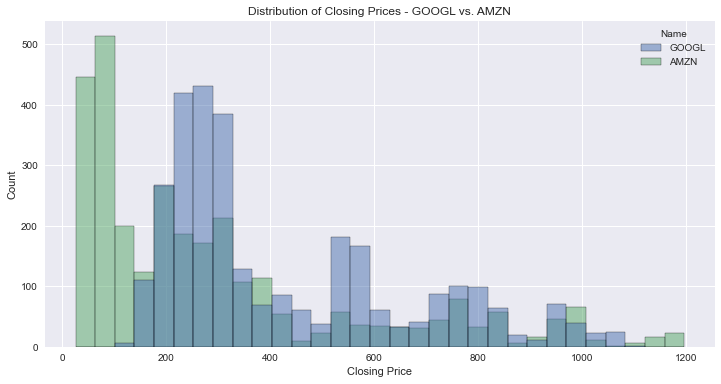

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=df, x="Close", hue="Name", ax=ax)
ax.set_title("Distribution of Closing Prices - GOOGL vs. AMZN")
ax.set_xlabel("Closing Price")

### Histogram Using `plotly.express`

In [33]:
fig = px.histogram(
    df,
    x="Close",
    color="Name",
    labels={"Close": "Closing Price"},
    title="Distribution of Closing Prices - GOOGL vs. AMZN",
    barmode="overlay",
)
fig.show()

## Scatter Plot

Read the data as follows:

In [34]:
url = "https://raw.githubusercontent.com/szrlee/Stock-Time-Series-Analysis/master/data/all_stocks_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(url)

stocks_filter = ["GOOGL", "AMZN"]
df = df.loc[
    (df.Name.isin(stocks_filter)) & (pd.to_datetime(df.Date).dt.year >= 2017),
    ["Date", "Name", "Open", "Close"],
]
df["Return"] = (df["Close"] - df["Open"]) / df["Open"]
df_wide = df.pivot(index="Date", columns="Name", values="Return")

### Scatter Plot Using `pandas`

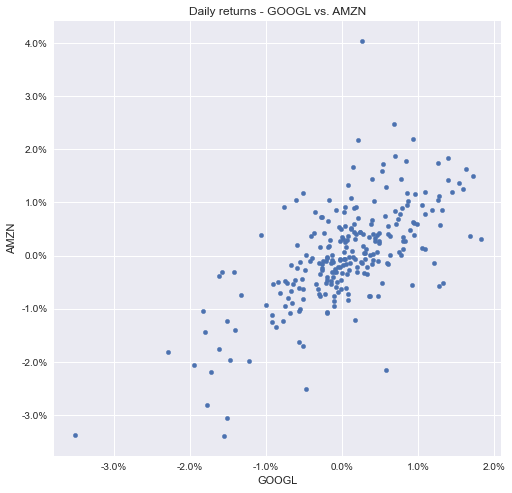

In [35]:
ax = df_wide.plot.scatter(
    x="GOOGL", y="AMZN", title="Daily returns - GOOGL vs. AMZN", figsize=(8, 8)
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

### Scatter Plot Using `matplotlib`

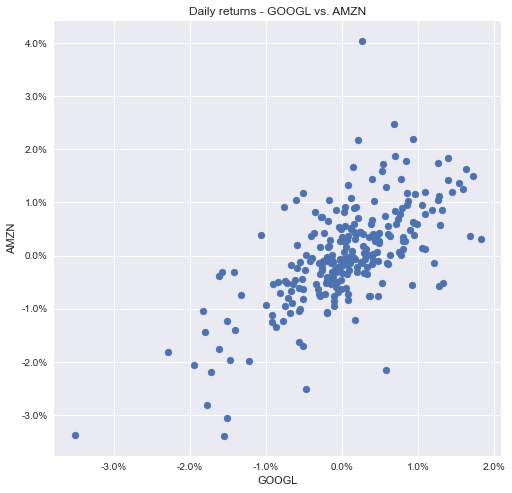

In [36]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(x=df_wide["GOOGL"], y=df_wide["AMZN"])

ax.set_xlabel("GOOGL")
ax.set_ylabel("AMZN")
ax.set_title("Daily returns - GOOGL vs. AMZN")

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

### Scatter Plot Using `seaborn`

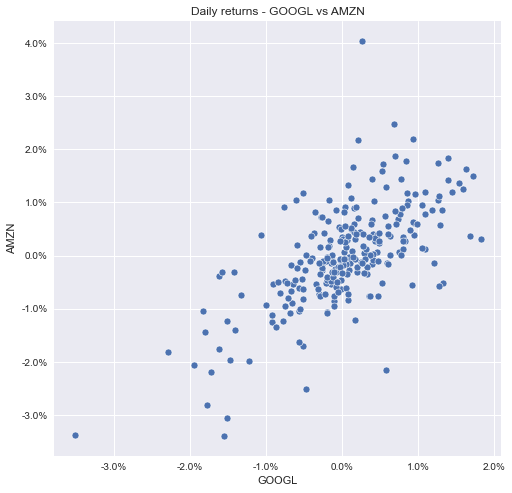

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=df_wide, x="GOOGL", y="AMZN", ax=ax)

ax.set_title("Daily returns - GOOGL vs AMZN")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

### Scatter Plot Using `plotly.express`

In [38]:
df_wide["GOOGL"] = df_wide["GOOGL"]
df_wide["AMZN"] = df_wide["AMZN"]

fig = px.scatter(df_wide, x="GOOGL", y="AMZN", title="Daily returns - GOOGL vs. AMZN")
fig.update_layout(yaxis_tickformat="%", xaxis_tickformat="%")
fig.show()

## Boxplot 

In [39]:
url = "https://raw.githubusercontent.com/szrlee/Stock-Time-Series-Analysis/master/data/all_stocks_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(url)

stocks = ["AMZN", "GOOGL", "IBM", "JPM"]
df = df.loc[
    (df.Name.isin(stocks)) & (pd.to_datetime(df.Date).dt.year == 2016),
    ["Date", "Name", "Close", "Open"],
]
df["Return"] = (df["Close"] - df["Open"]) / df["Open"]
df["Date"] = pd.to_datetime(df.Date)

### Boxplot Using `pandas`

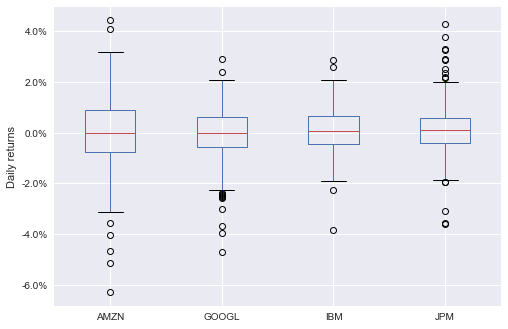

In [40]:
df_wide = df.pivot(index="Date", columns="Name", values="Return")
ax = df_wide.boxplot(column=stocks)

ax.set_ylabel("Daily returns")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

### Boxplot Using `matplotlib`

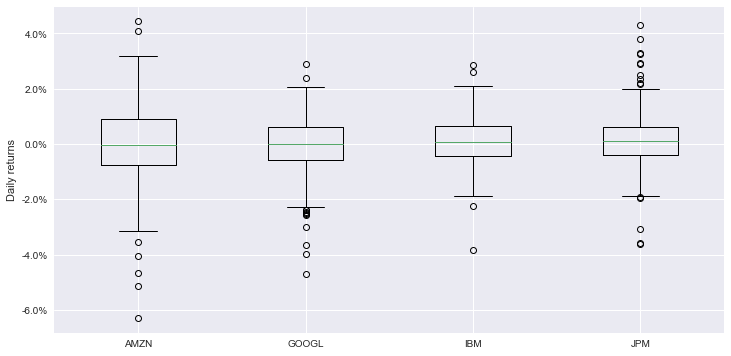

In [41]:
df_wide = df.pivot(index="Date", columns="Name", values="Return")

fig, ax = plt.subplots(figsize=(12, 6))

ax.boxplot([df_wide[col] for col in stocks], vert=True, autorange=True, labels=stocks)

ax.set_ylabel("Daily returns")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

### Boxplot Using `seaborn`

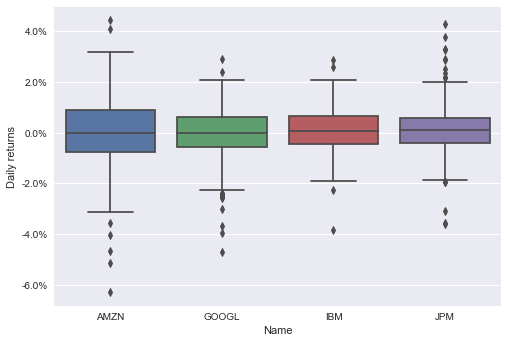

In [42]:
ax = sns.boxplot(x="Name", y="Return", data=df, order=stocks)

ax.set_ylabel("Daily returns")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

### Boxplot Using `plotly.express`

In [43]:
fig = px.box(df, x="Name", y="Return", category_orders={"Name": stocks})
fig.show()